# Compare Groups Script
Compares export groups from within a **single results**. Different targets are plotted side-by-side, different export groups are plotted on the same axes.

Available datasets:
	Allosteric_Pyramid_Full_Fall22,
	restart_bad_trajs.sh,
	Allosteric_Pyramid_Partial_Fall22,
	AlloSolidCube_X5_4_12Dec22,
	AlloSolidCube_X5_1_12Dec22,
	AlloSolidCube_X3_Singlet_12Dec22,
	check_traj_sizes.sh,
	helices_periodic_nopadding,
	WTSolidCube_FullyAddr_JB,
	Wereflamingo_X2,
	NoAlloPyramid_14Oct22,
	AlloPyramid_X4_14Mar23,
	recalculate_wereflamingo_clusters.sh,
	jobinfo.txt,
	AlloSolidCube_X1_12Dec22,
	Wereflamingo_X4,
	Wereflamingo_X3,
	WTSolidCube_Minimal_JB


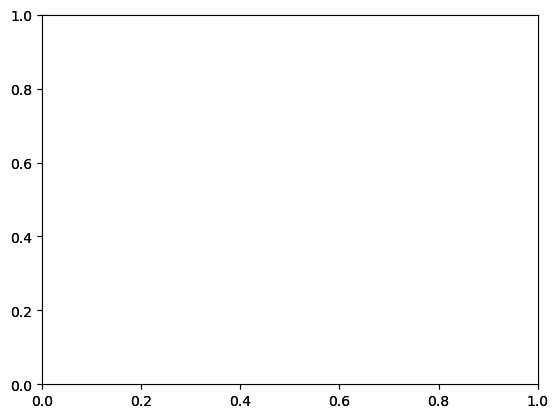

In [12]:
import sys
sys.path.append('../src')
from patchy.analysis.input_output import *
from functools import reduce
import altair as alt
print("Available datasets:\n\t" + ',\n\t'.join(os.listdir(sims_root())))

In [17]:
results_name = "Wereflamingo_X2"
results_name_readable = "Wereflamingo X3"

results = choose_results(results_name)

In [18]:
target_names = results.targets.keys()

In [19]:
# PARAMETERS!!!!!
# narrow type = set of parameters specifying bonding angles between patches
# cutoff = the lower limit for counting clusters as partially assembled forms of the target
# cutoff = 1 -> only count fully assembled clusters
cutoff = .8
overreach = False
sample_every = 1

In [20]:
all_data = []
for target_name in target_names:
    print(f"Analyzing {results_name} yields for target: {target_name}")
    data = results.get_stats(target_name, cutoff, overreach=overreach, sample_every=sample_every, verbose=True, grouping_cols = ['shape', 'nt', 'temp', 'time'])
    # data = dataset.get_flat_yields(target_name, cutoff, overreach=overreach)
    data['target'] = target_name
    all_data.append(data)
data = pd.concat(all_data, axis='index').reset_index()

Analyzing Wereflamingo_X2 yields for target: human
Computing yields of HUMANS duplicate 0 nt=0 T=0.01 with target=human, overreach=False, cutoff=0.8...



Please cite these publications for any work that uses the oxDNA simulation package
		- for the code:
			* P. Šulc et al., J. Chem. Phys. 137, 135101 (2012)
			* L. Rovigatti et al., J. Comput. Chem. 36, 1 (2015)
		- for the oxDNA model:
			* T. E. Ouldridge et al., J. Chem. Phys, 134, 085101 (2011)
		- for the oxDNA2 model:
			* B. E. K. Snodin et al., J. Chem. Phys. 142, 234901 (2015)
		- for the oxRNA model:
			* P. Šulc et al., J. Chem. Phys. 140, 235102 (2014)


ModuleNotFoundError: No module named 'analyseClusters'

In [ ]:
np.unique(data['shape'])

In [ ]:
print(f"Temperature options: {data['temp'].unique()}")

In [ ]:
### MORE PARAMETERS!!! ####
nt = 0
temperature = 0.01
ymax = 8
relative=True
groups = np.unique(data['shape'])

df = data[(data['nt'] == nt) & (data['temp'] == temperature)]


# assert(len(shapes) > 0)
# indexer = reduce(lambda a,b: (a | b), [df['shape'] == s for s in shapes])
# df = df[indexer]

# normalize yield if applicable, either way format x axis
if relative:
    df['yield_min'] = df['yield_min'] / ymax
    df['yield_max'] = df['yield_max'] / ymax
    # df['yield_stdev'] = df['yield_stdev'] / ymax
    df['yield'] =  df['yield'] / ymax
    ymax = 1.0
    x_axis_format = '.0%'
else:
    x_axis_format = '.00'
df['time'] /= 1e6 # convert steps to megasteps

charts = []
# if len(shapes) == 1:
#     chart_title = f"Comparison of Datasets: {', '.join(dataset_names_readable)} (Group: {shapes[0]}) (Narrow Type {nt})"
# else:
chart_title = f"Comparison of Datasets {results_name} Groups and Targets at Narrow Type {nt}, Temperature {temperature}"
temperatures = df['temp'].unique()
for i, t in enumerate(target_names):
    charts.append(alt.Chart(df[df['target'] == t], title=f"T={t}"))
    charts[i] = charts[i].mark_line().encode(
        x=alt.X('time:Q', title="Time (megasteps)", axis=alt.Axis(tickCount=5)),
        y=alt.Y(
            "yield:Q",
            title="Yield",
            scale=alt.Scale(domain=(0,ymax)),
            axis=alt.Axis(format=x_axis_format, tickCount=4)
        ),
        color=alt.Color('shape:O', scale=alt.Scale(scheme="accent"), title="Shape")
    ) + charts[i].mark_area(opacity=0.25).encode(
        x=alt.X("time:Q", axis=alt.Axis(tickCount=5)),
        y="yield_min:Q",
        y2="yield_max:Q",
        color=alt.Color('shape:O', scale=alt.Scale(scheme="accent"), title="Shape")
    )
chart = alt.hconcat(*charts)
# ) + alt.Chart(df).mark_errorband(extent='ci', opacity=0.2).encode(
#     x=alt.X('time:Q'),
#     y=alt.Y('yield', title='Yield'), accept_partials=True
#     color = alt.Color('shape', scale=alt.Scale())
# )).properties(width=600, height=450).facet(column='potential', row='type').properties(title=sim_name)"None of the students learn anything and it's your fault"

chart = chart.properties(title=chart_title)
chart.configure_axis(
    labelFontSize=18,
    titleFontSize=20
).configure_title(fontSize=24)
# chart.save(sims_root() + os.sep + results.export_name + os.sep + results.export_name + ".html")

In [ ]:
data

In [21]:
mintime

NameError: name 'mintime' is not defined